In [1]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Cria um conjunto de dados de exemplo
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1,
                           weights=[0.9], random_state=42)

# Divide o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprime a contagem de classes antes da aplicação do SMOTE
print("Antes do balanceamento:")
print("Classe 0: ", sum(y_train == 0))
print("Classe 1: ", sum(y_train == 1))

# Aplica o SMOTE para balanceamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Imprime a contagem de classes após a aplicação do SMOTE
print("Após o balanceamento:")
print("Classe 0: ", sum(y_train_resampled == 0))
print("Classe 1: ", sum(y_train_resampled == 1))

Antes do balanceamento:
Classe 0:  713
Classe 1:  87
Após o balanceamento:
Classe 0:  713
Classe 1:  713


## <span style="color: red;">Texto em vermelho</span>

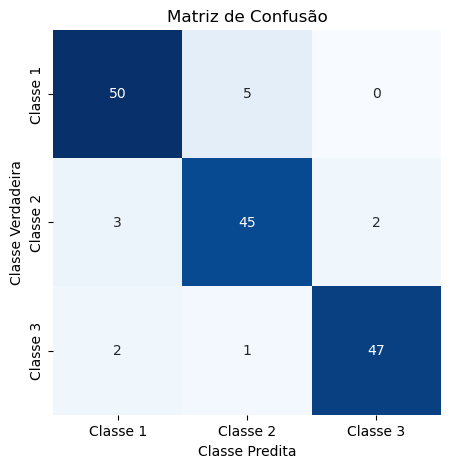

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_confusion_matrix(matrix, labels):
    plt.figure(figsize=(len(labels)+2, len(labels)+2))
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Classe Predita')
    plt.ylabel('Classe Verdadeira')
    plt.title('Matriz de Confusão')
    plt.show()

# Exemplo de matriz de confusão e rótulos de classe
matrix = [[50, 5, 0],
          [3, 45, 2],
          [2, 1, 47]]
labels = ['Classe 1', 'Classe 2', 'Classe 3']

# Chamar a função para plotar a matriz de confusão
plot_confusion_matrix(matrix, labels)

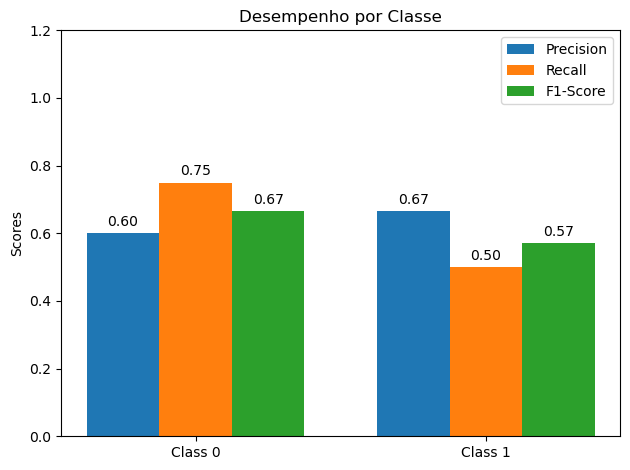

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Exemplo de rótulos verdadeiros e rótulos previstos pelo modelo
y_true = np.array([0, 1, 1, 0, 1, 0, 0, 1])
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 0])

# Calculando a precisão, recall e F1-score para cada classe
report = classification_report(y_true, y_pred, output_dict=True)

# Obtendo as métricas para cada classe
precision = [report[str(i)]['precision'] for i in range(len(report) - 3)]
recall = [report[str(i)]['recall'] for i in range(len(report) - 3)]
f1_score = [report[str(i)]['f1-score'] for i in range(len(report) - 3)]

# Rótulos das classes
labels = ['Class 0', 'Class 1']

# Plotando o gráfico de barras
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Desempenho por Classe')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adicionando os valores acima das barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.ylim(0, 1.2)
plt.tight_layout()
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_classification_report(report):
    # Obtendo as métricas para cada classe
    precision = [report[str(i)]['precision'] for i in range(len(report) - 3)]
    recall = [report[str(i)]['recall'] for i in range(len(report) - 3)]
    f1_score = [report[str(i)]['f1-score'] for i in range(len(report) - 3)]

    # Rótulos das classes
    labels = ['Class {}'.format(i) for i in range(len(report) - 3)]

    # Plotando o gráfico de barras
    x = np.arange(len(labels))
    width = 0.25

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, precision, width, label='Precision')
    rects2 = ax.bar(x, recall, width, label='Recall')
    rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

    ax.set_ylabel('Scores')
    ax.set_title('Desempenho por Classe')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # Adicionando os valores acima das barras
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.2f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    plt.ylim(0, 1.2)
    plt.tight_layout()
    plt.show()


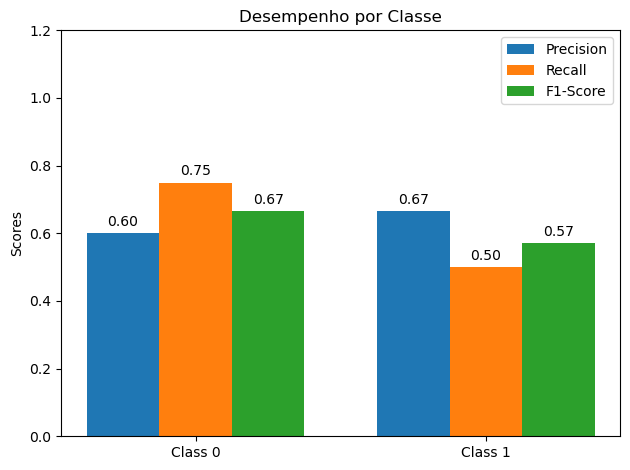

In [5]:
# Exemplo de rótulos verdadeiros e rótulos previstos pelo modelo
y_true = np.array([0, 1, 1, 0, 1, 0, 0, 1])
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 0])

# Calculando o relatório de classificação
report = classification_report(y_true, y_pred, output_dict=True)

# Plotando o gráfico de barras
plot_classification_report(report)


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_classification_report(report, labels):
    # Obtendo as métricas para cada classe
    precision = [report[str(i)]['precision'] for i in range(len(report) - 3)]
    recall = [report[str(i)]['recall'] for i in range(len(report) - 3)]
    f1_score = [report[str(i)]['f1-score'] for i in range(len(report) - 3)]

    # Plotando o gráfico de barras
    x = np.arange(len(labels))
    width = 0.25

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, precision, width, label='Precision')
    rects2 = ax.bar(x, recall, width, label='Recall')
    rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

    ax.set_ylabel('Scores')
    ax.set_title('Desempenho por Classe')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # Adicionando os valores acima das barras
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.2f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    plt.ylim(0, 1.2)
    plt.tight_layout()
    plt.show()


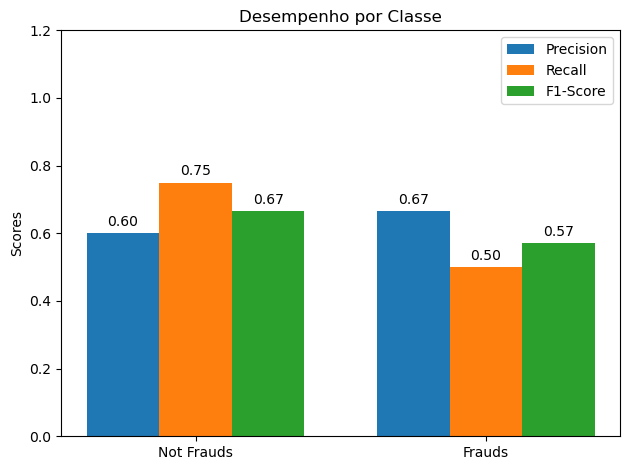

In [13]:
# Exemplo de rótulos verdadeiros e rótulos previstos pelo modelo
y_true = np.array([0, 1, 1, 0, 1, 0, 0, 1])
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 0])

# Calculando o relatório de classificação
report = classification_report(y_true, y_pred, output_dict=True)

# Plotando o gráfico de barras
plot_classification_report(report, ['Not Frauds', 'Frauds'])

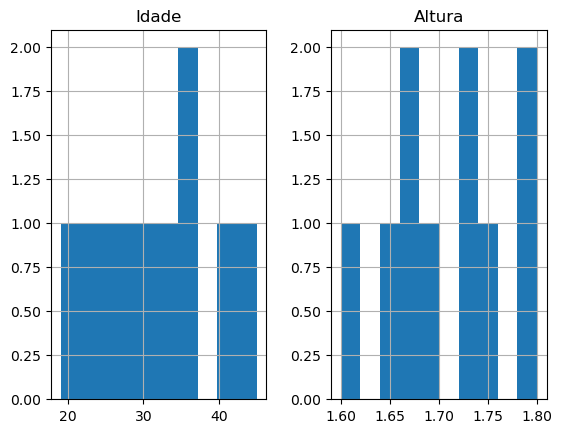

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Crie um DataFrame de exemplo
data = {'Idade': [25, 30, 35, 28, 32, 40, 45, 22, 19, 36],
        'Altura': [1.70, 1.65, 1.80, 1.75, 1.68, 1.72, 1.60, 1.78, 1.67, 1.73]}
df = pd.DataFrame(data)

# Plote o histograma
df.hist()

# Exiba o gráfico
plt.show()


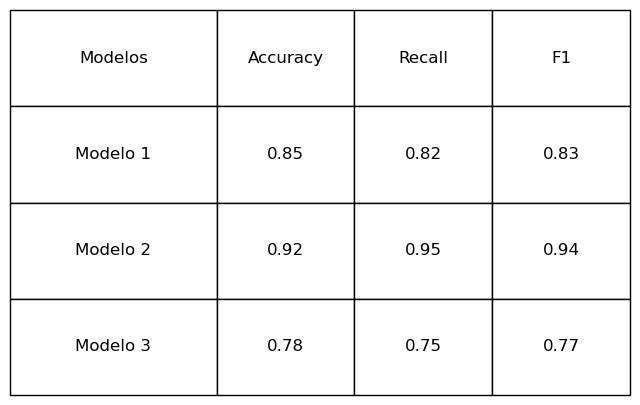

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados de exemplo
modelos = ['Modelo 1', 'Modelo 2', 'Modelo 3']
accuracy = [0.85, 0.92, 0.78]
recall = [0.82, 0.95, 0.75]
f1 = [0.83, 0.94, 0.77]

# Criação do DataFrame
data = {'Modelos': modelos, 'Accuracy': accuracy, 'Recall': recall, 'F1': f1}
df = pd.DataFrame(data)

# Criação da tabela
fig, ax = plt.subplots(figsize=(8, 5))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', colWidths=[0.3, 0.2, 0.2, 0.2], bbox=[0, 0, 1, 1])

# Estilização da tabela
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
table.set_fontsize(12)
table.set_fontsize(12)

# Exibição da tabela
plt.show()


In [2]:
from sklearn.metrics import roc_auc_score

# Exemplo de rótulos verdadeiros e probabilidades previstas pelo modelo
y_true = [0, 1, 1, 0, 1]
y_scores = [0.2, 0.6, 0.8, 0.3, 0.9]

# Calculando o roc_auc_score
auc_score = roc_auc_score(y_true, y_scores)
print("AUC Score:", auc_score)


AUC Score: 1.0
